In [45]:
import tensorflow as tf
import numpy as np
import pandas as pd


In [46]:
a = tf.add(3, 5, 'name')
# a = tf.add(3, 5)

print(a)

Tensor("name_5:0", shape=(), dtype=int32)


### Get Tensor

In [47]:
session = tf.Session()
print(session.run(a))

8


In [48]:
session.close()

In [49]:
print(a)

Tensor("name_5:0", shape=(), dtype=int32)


In [50]:
# x = 2
# y = 3
# op1 = tf.add(x, y)
# useless = tf.multiply(x, y)
# # useless = tf.m
# op3 = tf.pow(op2, op1)
# print(op2)

In [51]:
# with tf.Session() as session:
#     op3 = session.run(op3)
#     print(op3)

In [52]:
import matplotlib.pyplot as plt
from sklearn import datasets

In [53]:
x_data = datasets.load_boston().data[:, 12]
y_data = datasets.load_boston().target
# df = pd.DataFrame([x_data, y_data])
# df.head()

df = pd.DataFrame([x_data, y_data]).transpose()
df.head()

,0,1
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


In [54]:
w = tf.Variable(tf.random_normal([1]))
b = tf.Variable(tf.random_normal([1]))
print(w)
y_predicted = w * x_data + b

<tf.Variable 'Variable_8:0' shape=(1,) dtype=float32_ref>


In [72]:
loss = tf.reduce_mean(tf.square(y_predicted - y_data))
optimizer = tf.train.GradientDescentOptimizer(0.001)
train = optimizer.minimize(loss)

print(train)

name: "GradientDescent_2"
op: "NoOp"
input: "^GradientDescent_2/update_Variable_8/ApplyGradientDescent"
input: "^GradientDescent_2/update_Variable_9/ApplyGradientDescent"



In [70]:
with tf.Session() as session:
    session.run(tf.global_variables_initializer())
    
    for step in range(10 ** 4):
        session.run(train)
        if step % (10 ** 3) == 0:
            print("Step {}: w {} b {}".format(step, session.run(w), session.run(b)))
            print("loss {}".format(session.run(loss)))
            print()
    w_out, b_out = session.run([w, b])

Step 0: w [[-0.97636768 -0.2021984  -0.41805273  0.10730666 -0.07648112]] b [-0.914274]
loss 501.3551861448292

Step 1000: w [[-1.69829865 -0.6525431  -1.02934342  0.41884636  0.06945241]] b [-0.914274]
loss 48.59069713701936

Step 2000: w [[-2.04920903 -0.95631494 -1.32534565  0.51387297  0.12505377]] b [-0.914274]
loss 40.428869600146825

Step 3000: w [[-2.31724917 -1.19154622 -1.57145999  0.54911588  0.14847806]] b [-0.914274]
loss 39.36991148929709

Step 4000: w [[-2.56320348 -1.38693065 -1.78122588  0.58087727  0.173807  ]] b [-0.914274]
loss 34.455556673918366

Step 5000: w [[-2.7681885  -1.53449481 -1.92886448  0.59934878  0.1938624 ]] b [-0.914274]
loss 28.646470005086442

Step 6000: w [[-2.85627502 -1.60195999 -1.98807817  0.61167999  0.20714374]] b [-0.914274]
loss 27.61245714469238

Step 7000: w [[-2.81032708 -1.58937234 -1.96509154  0.61663172  0.21193241]] b [-0.914274]
loss 27.52934579126969

Step 8000: w [[-2.63133447 -1.52054975 -1.87860586  0.61824802  0.21276915]] b [

ValueError: operands could not be broadcast together with shapes (506,) (1,5) 

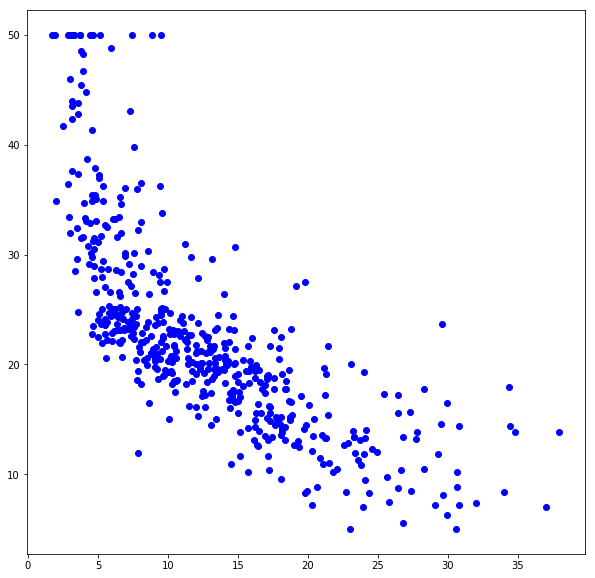

In [71]:
plt.figure(figsize=(10, 10))
plt.plot(x_data, y_data, 'bo', label="Real data")
plt.plot(x_data, x_data * w_out + b_out, 'ro', label="Prediction")
plt.legend()
plt.show()

In [58]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets


In [59]:
x_data = datasets.load_boston().data[:, 12]
y_data = datasets.load_boston().target
# df = pd.DataFrame([x_data, y_data])
# df.head()

df = pd.DataFrame([x_data, y_data]).transpose()
df.head()

,0,1
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


In [60]:
_x_data = tf.reshape(x_data, [len(x_data), 1])
_y_data = tf.reshape(y_data, [len(y_data), 1])

w = tf.Variable(tf.random_normal([1, 5], dtype=tf.float64))
w2 = tf.Variable(tf.random_normal([5, 10], dtype=tf.float64))
w_out = tf.Variable(tf.random_normal([10, 1], dtype=tf.float64))

hidden = tf.nn.elu(tf.matmul(_x_data, w))
hidden2 = tf.nn.elu(tf.matmul(hidden, w2))
output = tf.matmul(hidden2, w_out)


In [61]:
    loss = tf.reduce_mean(tf.square(output - _y_data))
    optimizer = tf.train.AdamOptimizer(0.001)
    train = optimizer.minimize(loss)

In [62]:
with tf.Session() as session:
    session.run(tf.global_variables_initializer())
    
    for step in range(5 * (10 ** 4)):
        session.run(train)
        if step % (5 * (10 ** 3)) == 0:
            print("Step {} || Loss : {}".format(step, session.run(loss)))
            
    output = session.run(output)

Step 0 || Loss : 733.3533352845024
Step 5000 || Loss : 27.291001012209858
Step 10000 || Loss : 26.265749968375488
Step 15000 || Loss : 26.114863059647924
Step 20000 || Loss : 26.064388784510747
Step 25000 || Loss : 26.059690421291695
Step 30000 || Loss : 26.05422896071504
Step 35000 || Loss : 26.053063422818422
Step 40000 || Loss : 26.049309530063404
Step 45000 || Loss : 26.046970121033944


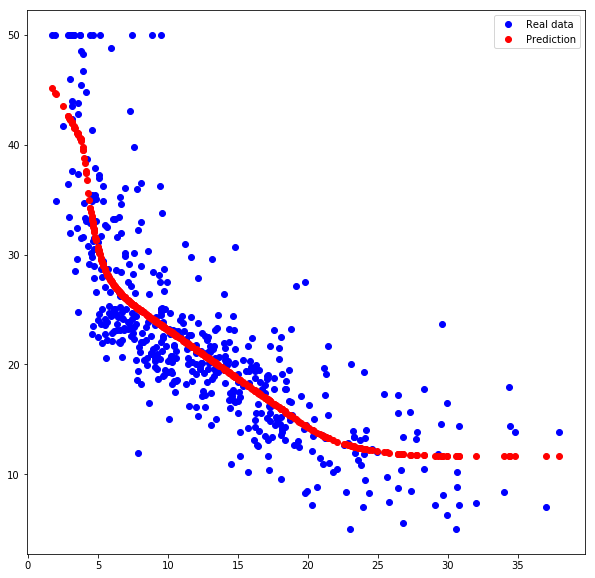

In [66]:
plt.figure(figsize=(10, 10))
plt.plot(x_data, y_data, 'bo', label="Real data")
plt.plot(x_data, output, 'ro', label="Prediction")
plt.legend()
plt.show()

In [73]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [74]:
x_data = datasets.load_boston().data[:, 12]
y_data = datasets.load_boston().target
# df = pd.DataFrame([x_data, y_data])
# df.head()

df = pd.DataFrame([x_data, y_data]).transpose()
df.head()

,0,1
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


In [82]:
_x_data = tf.reshape(x_data, [len(x_data), 1])
_y_data = tf.reshape(y_data, [len(y_data), 1])

w = tf.Variable(tf.random_normal([1, 5], dtype=tf.float64))
w2 = tf.Variable(tf.random_normal([5, 10], dtype=tf.float64))
w_out = tf.Variable(tf.random_normal([10, 1], dtype=tf.float64))

hidden = tf.nn.elu(tf.matmul(_x_data, w))
hidden2 = tf.nn.elu(tf.matmul(hidden, w2))
output = tf.matmul(hidden2, w_out)


In [83]:
    loss = tf.reduce_mean(tf.square(output - _y_data))
    optimizer = tf.train.AdamOptimizer(0.001)
    train = optimizer.minimize(loss)

In [84]:
with tf.Session() as session:
    session.run(tf.global_variables_initializer())
    
    for step in range(5 * (10 ** 4)):
        session.run(train)
        if step % (5 * (10 ** 3)) == 0:
            print("Step {} || Loss : {}".format(step, session.run(loss)))
            
    output = session.run(output)

Step 0 || Loss : 634.2317984097733
Step 5000 || Loss : 27.48304303665865
Step 10000 || Loss : 26.389988998863355
Step 15000 || Loss : 26.151638454260436
Step 20000 || Loss : 26.11817852897962
Step 25000 || Loss : 26.102889112824542
Step 30000 || Loss : 26.09204540113975
Step 35000 || Loss : 26.087219113453166
Step 40000 || Loss : 26.084132569768865
Step 45000 || Loss : 26.081988492525692


### PlaceHolder : 함수와 같이 데이터 변수를 담는 그릇을 의미한다.